<a href="https://colab.research.google.com/github/YuliyaMatiyuk/2_1_-_-/blob/main/Kopie_von_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [2]:
! pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.0 MB/s eta 0:00:00


In [3]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [4]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [5]:
cursor = con.cursor()

In [6]:
sql = """
SELECT MAX(hire_date), MIN(hire_date) FROM employees
"""

In [7]:
cursor.execute(sql)

In [8]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [9]:
sql = """
SELECT emp_no, salary, from_date, to_date
FROM salaries s1
WHERE to_date = (
    SELECT MAX(to_date)
    FROM salaries s2
    WHERE s1.emp_no = s2.emp_no
)
ORDER BY emp_no;
"""

In [10]:
cursor.execute(sql)

In [11]:
rows = cursor.fetchall()

In [12]:
field_names = [i[0] for i in cursor.description]

In [13]:
import pandas as pd

In [14]:
res = pd.DataFrame(rows, columns=field_names)

In [16]:
print("Назви колонок:", res.columns)

Назви колонок: Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')


In [17]:
print("Розмір DataFrame:", res.shape)

Розмір DataFrame: (300180, 4)


In [18]:
print("Перші 3 записи DataFrame:")
print(res.head(3))

Перші 3 записи DataFrame:
   emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [19]:
print(res.dtypes)

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object


In [20]:
to_date_equal = res[res['to_date'] == '9999-01-01']

In [21]:
to_date_not_equal = res[res['to_date'] != '9999-01-01']

In [22]:
count_equal = to_date_equal.shape[0]

In [23]:
count_not_equal = to_date_not_equal.shape[0]

In [24]:
print("Кількість значень to_date, які рівні '9999-01-01':", count_equal)
print("Кількість значень to_date, які не рівні '9999-01-01':", count_not_equal)

Кількість значень to_date, які рівні '9999-01-01': 0
Кількість значень to_date, які не рівні '9999-01-01': 300180


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [25]:
import pandas as pd

In [26]:
import matplotlib.pyplot as plt

In [58]:
current_employees = res[res['to_date'] == '9999-01-01']

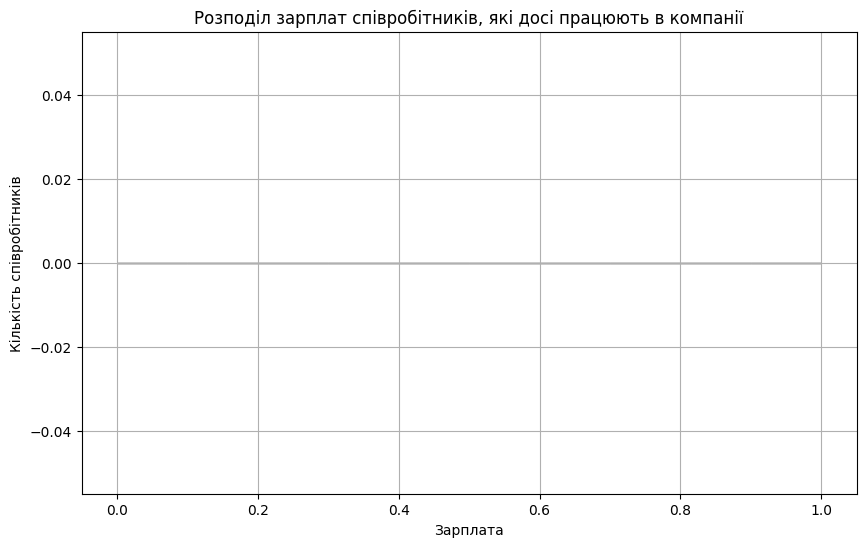

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(current_employees['salary'], bins=10, edgecolor='black')
plt.title('Розподіл зарплат співробітників, які досі працюють в компанії')
plt.xlabel('Зарплата')
plt.ylabel('Кількість співробітників')
plt.grid(True)
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [60]:
con.close()